# DBSCAN 

In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs, make_moons, make_circles
import numpy as np 
from scipy.linalg import eigh
import matplotlib.pyplot as plt 
from  sklearn.datasets  import make_moons

In [2]:
X , Y = make_moons(n_samples=500, noise=0.06)

In [3]:
from sklearn.cluster import KMeans

class Spectral_clustering: 
    def __init__(self, n_clusters, weight_init="Gaussian", epsilon=0.5, k=5):
        self.epsilon = epsilon
        self.k = k   
        self.n_clusters = n_clusters
        self.weight_init = weight_init
        self.W = None
        self.D = None
        self.fit_kmeans = None

    def init_weights(self, X):
        self.W = np.zeros((X.shape[0], X.shape[0]))
        self.D = np.zeros((X.shape[0], X.shape[0]))
        
        if self.weight_init == "epsilonN":
            for i in range(X.shape[0]): 
                for j in range(X.shape[0]):
                    if np.linalg.norm(X[i] - X[j])< self.epsilon:
                        self.W[i, j] += np.linalg.norm(X[i] - X[j])
        
        elif self.weight_init == 'KNN':
            for i in range(X.shape[0]):
                dist = np.linalg.norm(X[i] - X, axis=1)
                k_dist = np.argsort(dist)
                k_dist = k_dist[1 : self.k + 1] 
                for j in k_dist:
                    self.W[i, j] = np.linalg.norm(X[i] - X[j])
                    self.W[j, i] = np.linalg.norm(X[i] - X[j]) 
        else:  # Gaussian
            median_dist = np.median(np.linalg.norm(X - X[:, np.newaxis], axis=2))  
            for i in range(X.shape[0]):
                for j in range(X.shape[0]):
                    if i != j:
                        dist = np.linalg.norm(X[i] - X[j])
                        self.W[i, j] += np.exp(-dist / (2 * median_dist**2))
        for i in range(len(self.W)):
            self.D[i, i] += np.sum(self.W[i])
            
            
    def fit(self, X):
        self.init_weights(X)
        L = self.D - self.W
        L = np.linalg.inv(np.sqrt(self.D)) @ L @ np.linalg.inv(np.sqrt(self.D))
        eigenvalues, eigenvectors = eigh(L, eigvals=(0, self.n_clusters ))
        x_new = eigenvectors
        kmeans = KMeans(n_clusters=self.n_clusters, n_init=10)
        kmeans.fit(x_new)
        self.fit_kmeans = kmeans.predict(x_new)

    def predict(self, X):
        return self.fit_kmeans


In [4]:
s= Spectral_clustering( n_clusters = 2 ,weight_init = "KNN"  , epsilon= 0.2 ,k = 8)
s.fit(X)

/var/folders/9f/r8h0fl6158l8g2_8l65x2zv00000gn/T/ipykernel_40082/1749118367.py:46: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eigenvalues, eigenvectors = eigh(L, eigvals=(0, self.n_clusters ))


In [5]:
pred = s.predict(X)


/Users/alissa/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


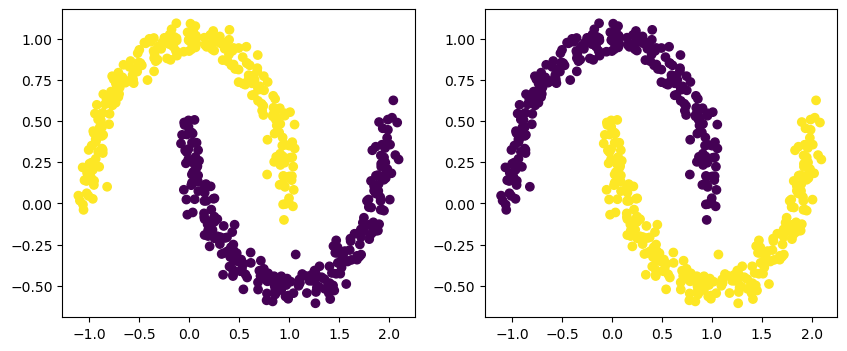

In [6]:
sklearn_spectral = SpectralClustering(n_clusters = 2  , affinity = 'nearest_neighbors')
pred1 = sklearn_spectral.fit_predict(X)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  
ax1.scatter(X[:, 0], X[:, 1], c=pred, cmap='viridis')
ax2.scatter(X[:, 0], X[:, 1], c=pred1, cmap='viridis')